In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [2]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [3]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000e+00,77.6680,300.0,0.000000,0.000000,0.000000,0.000000
1,1.000000e-19,77.6680,300.0,4.447837,0.000001,0.002537,6.671755
2,1.100000e-18,77.6680,300.0,4.447837,0.000001,0.002537,6.671755
3,1.110000e-17,77.6680,300.0,4.447837,0.000001,0.002537,6.671755
4,1.111000e-16,77.6680,300.0,4.447837,0.000001,0.002537,6.671755
...,...,...,...,...,...,...,...
2261,9.548300e-04,2.5653,300.0,2.603555,0.019268,1.591000,3.905332
2262,9.652200e-04,2.5630,300.0,2.602521,0.019262,1.589100,3.903781
2263,9.756700e-04,2.5653,300.0,2.603555,0.019267,1.591000,3.905332
2264,9.860700e-04,2.5653,300.0,2.603555,0.019267,1.590900,3.905332


In [4]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [5]:
df_den

,Time_s,E,AR,AR*,AR^+,AR2^+,AR(W)^+,AR2(W)^+,E(W)
0,0.000000e+00,1.000000e+06,3.218800e+18,0.000000e+00,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000e-19,1.000000e+06,3.218800e+18,1.141100e-04,1.000000e+06,2.331200e-07,5.521600e-10,1.725400e-22,5.521600e-10
2,1.100000e-18,1.000000e+06,3.218800e+18,1.255200e-03,1.000000e+06,2.564300e-06,6.073800e-09,1.213500e-20,6.073800e-09
3,1.109999e-17,1.000000e+06,3.218800e+18,1.266600e-02,1.000000e+06,2.587600e-05,6.129000e-08,9.403100e-19,6.129000e-08
4,1.110987e-16,1.000000e+06,3.218800e+18,1.267700e-01,1.000000e+06,2.589900e-04,6.134500e-07,8.435800e-17,6.134500e-07
...,...,...,...,...,...,...,...,...,...
2261,9.548346e-04,3.170100e+11,3.218800e+18,2.012600e+11,2.084700e+09,3.149300e+11,6.485900e+09,9.676200e+11,9.741100e+11
2262,9.652179e-04,3.169900e+11,3.218800e+18,2.012100e+11,2.080300e+09,3.149100e+11,6.555700e+09,9.781900e+11,9.847400e+11
2263,9.756746e-04,3.170100e+11,3.218800e+18,2.012500e+11,2.084600e+09,3.149200e+11,6.626100e+09,9.888300e+11,9.954500e+11
2264,9.860676e-04,3.170100e+11,3.218800e+18,2.012500e+11,2.084700e+09,3.149200e+11,6.696000e+09,9.994000e+11,1.006100e+12


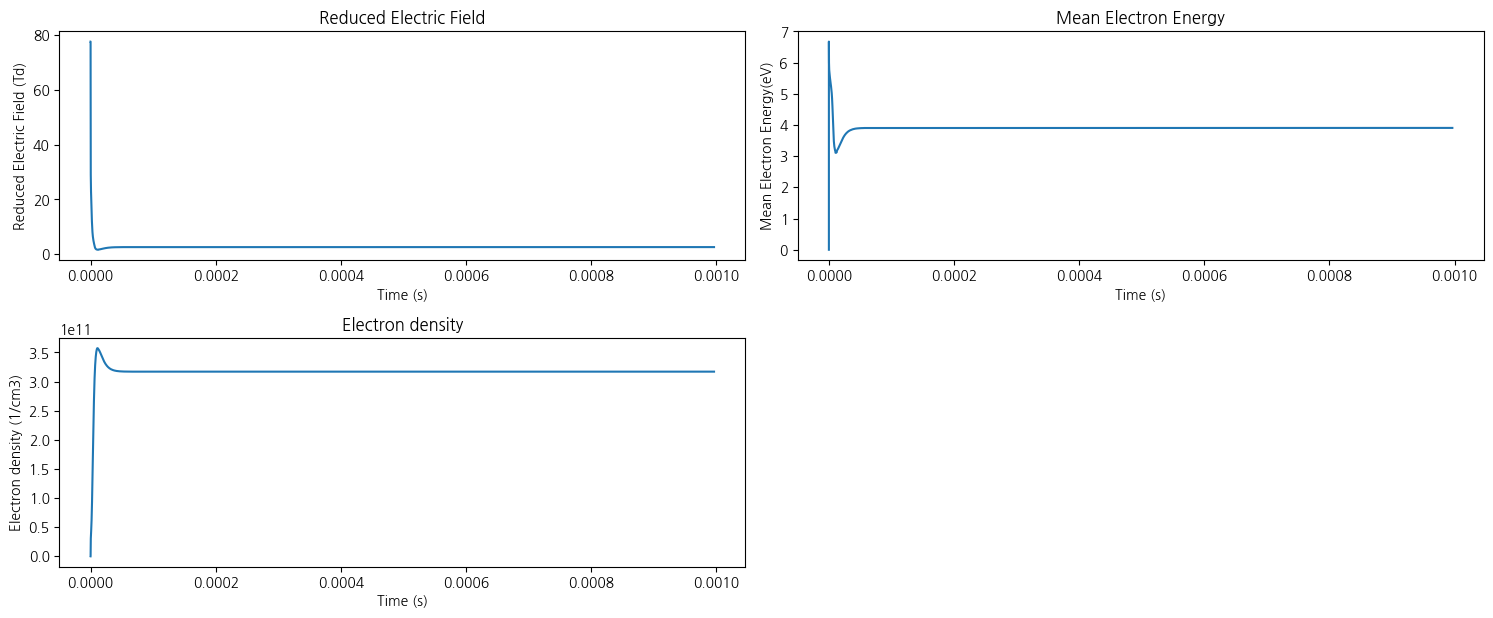

In [6]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')


plt.tight_layout()
plt.show()

In [7]:
df.columns

NameError: name 'df' is not defined